<a href="https://colab.research.google.com/github/Baobui19112001/BaiTapCNN/blob/main/Nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import random
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)   
train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/Nhandangkhuonmat/Train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')
validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/Nhandangkhuonmat/Validation',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 63 images belonging to 3 classes.
Found 10 images belonging to 3 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       2

In [ ]:
history=model.fit(train_dataset,batch_size=400,epochs=40,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/40
7/7 [==============================] - 15s 2s/step - loss: 1.2747 - accuracy: 0.7460 - val_loss: 0.7817 - val_accuracy: 0.9000
Epoch 2/40
7/7 [==============================] - 6s 838ms/step - loss: 0.6886 - accuracy: 0.8413 - val_loss: 0.6311 - val_accuracy: 0.8000
Epoch 3/40
7/7 [==============================] - 6s 887ms/step - loss: 0.3330 - accuracy: 0.8730 - val_loss: 1.2789 - val_accuracy: 0.8000
Epoch 4/40
7/7 [==============================] - 6s 829ms/step - loss: 0.1769 - accuracy: 0.9683 - val_loss: 1.8955 - val_accuracy: 0.8000
Epoch 5/40
7/7 [==============================] - 6s 834ms/step - loss: 0.1517 - accuracy: 0.9683 - val_loss: 2.8479 - val_accuracy: 0.8000
Epoch 6/40
7/7 [==============================] - 6s 891ms/step - loss: 0.2589 - accuracy: 0.9048 - val_loss: 3.1255 - val_accuracy: 0.8000
Epoch 7/40
7/7 [==============================] - 6s 843ms/step - loss: 0.2868 - accuracy: 0.9206 - val_loss: 4.0693 - val_accuracy: 0.8000
Epoch 8/40
7/7 [======

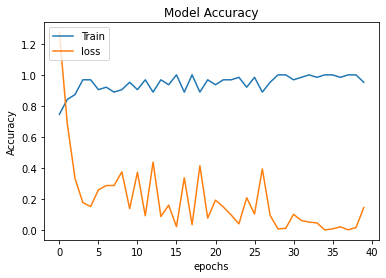

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()

In [ ]:
pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.1 MB/s 


Bao
{'box': [478, 189, 216, 240], 'confidence': 0.9994970560073853, 'keypoints': {'left_eye': (534, 277), 'right_eye': (639, 266), 'nose': (581, 296), 'mouth_left': (545, 368), 'mouth_right': (631, 360)}}


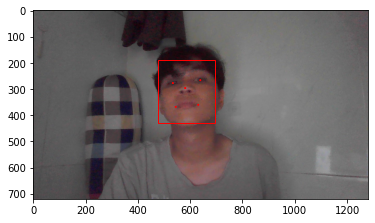

In [ ]:
filename = '/content/drive/MyDrive/AI/Nhandangkhuonmat/Validation/Anhbanthan/khuonmat (39).jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
# plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Tien Linh')
elif kq ==1:
  print('Cong Phuong')
elif kq ==2:
  print('Bao')
import matplotlib.pyplot as plt
from mtcnn import MTCNN
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)
data = plt.imread(filename)
plt.imshow(data)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False, color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()

Tien Linh
{'box': [344, 53, 50, 74], 'confidence': 0.9999524354934692, 'keypoints': {'left_eye': (354, 78), 'right_eye': (376, 79), 'nose': (360, 88), 'mouth_left': (354, 106), 'mouth_right': (373, 107)}}
{'box': [187, 160, 36, 42], 'confidence': 0.9645693898200989, 'keypoints': {'left_eye': (197, 174), 'right_eye': (212, 173), 'nose': (204, 182), 'mouth_left': (201, 191), 'mouth_right': (212, 190)}}
{'box': [481, 357, 29, 36], 'confidence': 0.8338552713394165, 'keypoints': {'left_eye': (485, 374), 'right_eye': (498, 371), 'nose': (491, 382), 'mouth_left': (489, 388), 'mouth_right': (501, 385)}}


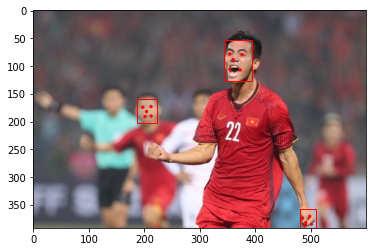

In [ ]:
filename = '/content/drive/MyDrive/AI/Nhandangkhuonmat/Validation/AnhTienLinh/TienLinh (3).jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
# plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Bao')
elif kq ==1:
  print('Cong Phuong')
elif kq ==2:
  print('Tien Linh')
import matplotlib.pyplot as plt
from mtcnn import MTCNN
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)
data = plt.imread(filename)
plt.imshow(data)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False, color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()